In [27]:
import os
import zipfile
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import math
import random
import shutil

In [3]:
local_zip = "animal.zip"
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('animal')
zip_ref.close()


In [6]:
DATA_DIR = 'animal'

# Subdirectories for each class
data_dir_bear = os.path.join(DATA_DIR, 'animal/bear_png')
data_dir_chinkara = os.path.join(DATA_DIR, 'animal/chinkara')


# os.listdir returns a list containing all files under the given dir
print(f"There are {len(os.listdir(data_dir_bear))} images of bear.")
print(f"There are {len(os.listdir(data_dir_chinkara))} images of chinkara.")

There are 52 images of bear.
There are 61 images of chinkara.


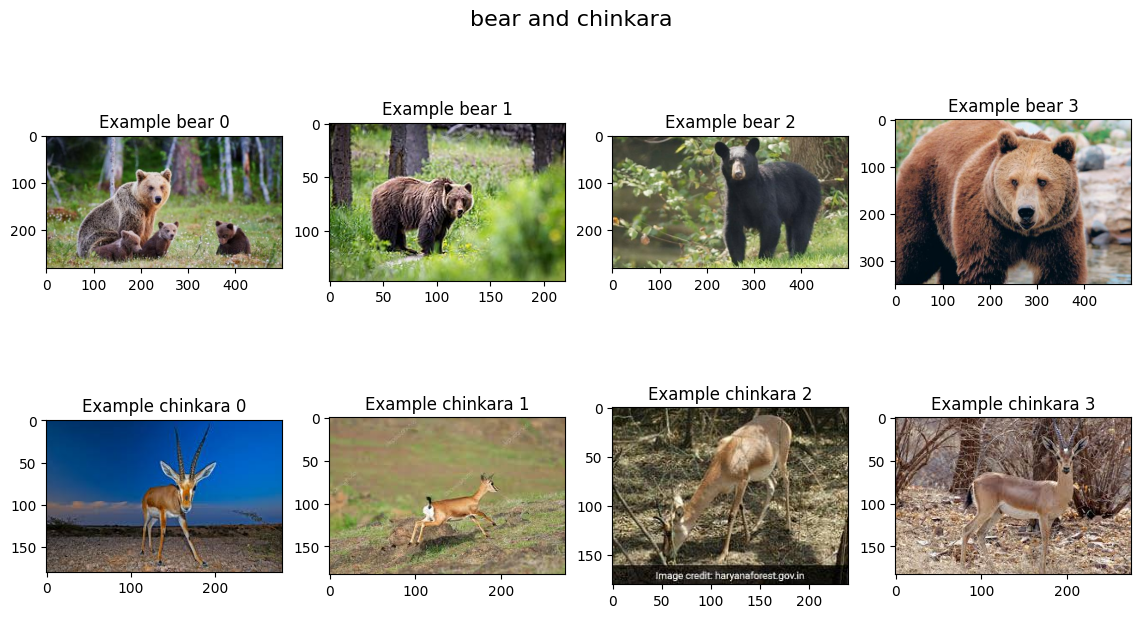

In [79]:
bear_filenames = [os.path.join(data_dir_bear, filename) for filename in os.listdir(data_dir_bear)]
chinkara_filenames = [os.path.join(data_dir_chinkara, filename) for filename in os.listdir(data_dir_chinkara)]
fig, axes = plt.subplots(2, 4, figsize=(14, 7))
fig.suptitle('bear and chinkara', fontsize=16)

# Plot the first 4 images of each class
for i, bear_image in enumerate(bear_filenames[:4]):
    img = tf.keras.utils.load_img(bear_image)
    axes[0, i].imshow(img)
    axes[0, i].set_title(f'Example bear {i}')

for i, chinkara_image in enumerate(chinkara_filenames[:4]):
    img = tf.keras.utils.load_img(chinkara_image)
    axes[1, i].imshow(img)
    axes[1, i].set_title(f'Example chinkara {i}')

plt.show()

In [31]:
source='animal'
target='./train_data/'
shutil.copytree(source, target)
os.mkdir('test_data')

In [49]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Set the paths
main_folder = 'animal/animal'  # Path to the subfolder containing 7 subdirectories
train_folder = 'animal/train'
test_folder = 'animal/test'

# Create train and test folders if they don't exist
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

# Define the split ratio
train_ratio = 0.8  # 80% for training
test_ratio = 0.2   # 20% for testing

# Allowed image extensions (add more if needed)
image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.tiff']

# Loop through each subfolder (each class)
for class_folder in os.listdir(main_folder):
    class_path = os.path.join(main_folder, class_folder)
    
    # Check if it's a directory (class folder)
    if os.path.isdir(class_path):
        # Get list of all image files in the subfolder
        images = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f)) and os.path.splitext(f)[1].lower() in image_extensions]
        
        # Skip the folder if no images are found
        if len(images) == 0:
            print(f"No images found in folder: {class_folder}. Skipping...")
            continue
        
        # Split the images into train and test
        train_images, test_images = train_test_split(images, test_size=test_ratio, random_state=42)
        
        # Create corresponding class directories in train and test folders
        os.makedirs(os.path.join(train_folder, class_folder), exist_ok=True)
        os.makedirs(os.path.join(test_folder, class_folder), exist_ok=True)
        
        # Move the train images
        for image in train_images:
            src = os.path.join(class_path, image)
            dest = os.path.join(train_folder, class_folder, image)
            shutil.copy(src, dest)
        
        # Move the test images
        for image in test_images:
            src = os.path.join(class_path, image)
            dest = os.path.join(test_folder, class_folder, image)
            shutil.copy(src, dest)

print("Image splitting into train and test sets is completed!")


Image splitting into train and test sets is completed!


In [51]:
import os

# Set the paths
train_folder = 'animal/train'
test_folder = 'animal/test'

# Function to count images in a folder
def count_images(folder):
    total_images = 0
    for class_folder in os.listdir(folder):
        class_path = os.path.join(folder, class_folder)
        if os.path.isdir(class_path):
            # Count the number of image files in the class folder
            image_count = len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])
            total_images += image_count
            print(f"Number of images in {class_folder}: {image_count}")
    return total_images

# Count images in train and test folders
train_count = count_images(train_folder)
test_count = count_images(test_folder)

print(f"\nTotal images in train folder: {train_count}")
print(f"Total images in test folder: {test_count}")


Number of images in tiger: 52
Number of images in chinkara: 48
Number of images in elephant: 49
Number of images in sheep: 46
Number of images in lion: 48
Number of images in pig: 48
Number of images in bear_png: 41
Number of images in peacock: 48
Number of images in tiger: 13
Number of images in chinkara: 13
Number of images in elephant: 13
Number of images in sheep: 12
Number of images in lion: 12
Number of images in pig: 12
Number of images in bear_png: 11
Number of images in peacock: 12

Total images in train folder: 380
Total images in test folder: 98


Found 380 images belonging to 8 classes.
Found 98 images belonging to 8 classes.
Epoch 1/10
12/12 [==============================] - 22s 2s/step - loss: 2.1097 - accuracy: 0.0974 - val_loss: 2.0512 - val_accuracy: 0.1837
Epoch 2/10
12/12 [==============================] - 21s 2s/step - loss: 2.0361 - accuracy: 0.1737 - val_loss: 1.9889 - val_accuracy: 0.2755
Epoch 3/10
12/12 [==============================] - 20s 2s/step - loss: 1.9321 - accuracy: 0.2579 - val_loss: 1.9462 - val_accuracy: 0.3265
Epoch 4/10
12/12 [==============================] - 21s 2s/step - loss: 1.8641 - accuracy: 0.2789 - val_loss: 1.7855 - val_accuracy: 0.3673
Epoch 5/10
12/12 [==============================] - 20s 2s/step - loss: 1.7185 - accuracy: 0.3737 - val_loss: 1.6360 - val_accuracy: 0.3980
Epoch 6/10
12/12 [==============================] - 21s 2s/step - loss: 1.5784 - accuracy: 0.4026 - val_loss: 1.5395 - val_accuracy: 0.4286
Epoch 7/10
12/12 [==============================] - 22s 2s/step - loss: 1.4979 

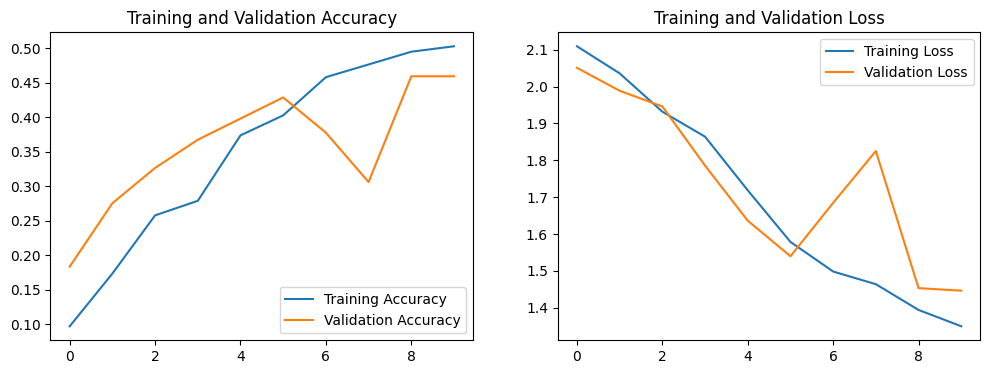

4/4 [==============================] - 2s 452ms/step - loss: 1.4460 - accuracy: 0.4592
Test accuracy: 45.92%


In [52]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

# Set the paths
train_folder = 'animal/train'
test_folder = 'animal/test'

# Image parameters
image_size = (128, 128)  # Resize all images to 128x128
batch_size = 32  # Number of images to process in a batch
num_classes = len(os.listdir(train_folder))  # Number of classes

# Data augmentation and loading images from directory
train_datagen = ImageDataGenerator(
    rescale=1./255,           # Normalize pixel values
    shear_range=0.2,          # Randomly apply shearing
    zoom_range=0.2,           # Randomly zoom in images
    horizontal_flip=True,     # Randomly flip images horizontally
)

test_datagen = ImageDataGenerator(rescale=1./255)  # Only normalize test images

# Load train and test datasets
train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'  # For multi-class classification
)

test_generator = test_datagen.flow_from_directory(
    test_folder,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Define the CNN model
model = Sequential()

# Convolution + Pooling layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from convolution layers and connect to fully connected layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout to reduce overfitting
model.add(Dense(num_classes, activation='softmax'))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=10,  # You can increase this value for better training
    validation_data=test_generator
)

# Plot training history (accuracy and loss)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc * 100:.2f}%")


In [57]:
# Get the mapping of class indices to class names
class_indices = train_generator.class_indices

# Print the mapping
print("Class Indices:")
for class_name, index in class_indices.items():
    print(f"Class: {class_name}, Index: {index}")


Class Indices:
Class: bear_png, Index: 0
Class: chinkara, Index: 1
Class: elephant, Index: 2
Class: lion, Index: 3
Class: peacock, Index: 4
Class: pig, Index: 5
Class: sheep, Index: 6
Class: tiger, Index: 7


In [75]:
img = tf.keras.utils.load_img("chink.jpg",target_size=(128,128))
img=tf.keras.utils.img_to_array(img)
img=np.expand_dims(img,axis=0)
prediction=model.predict(img)

1/1 [==============================] - 0s 148ms/step


In [76]:
prediction

array([[0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [77]:
print(max(prediction[0]))

1.0


In [78]:
predicted_index = np.argmax(prediction)  # Get the index of the maximum probability

# Reverse the class_indices dictionary to map indices to class names
class_labels = {v: k for k, v in train_generator.class_indices.items()}

# Get the class name
predicted_class = class_labels[predicted_index]
print(f"Predicted class: {predicted_class}")

Predicted class: chinkara
